Importing all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from datetime import timedelta

from sklearn.model_selection import train_test_split, RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor


Loading the scaler and data


In [2]:

#Load Data and Scaler

scaled_df = pd.read_csv(r'C:\Users\allif\Downloads\Crypto_stocks\data\processed\scaled_predictive_coins.csv', parse_dates=['Date'])

scaled_df.head()

# removing null values
scaled_df = scaled_df.dropna()

#Loading the minmax scaler for inverse transformation
scaler = joblib.load(r'C:\Users\allif\Downloads\Crypto_stocks\notebooks\minmax_scaler_close_prices.pkl')



In [3]:
scaled_df.head()# defining coins and columns

,Date,BTC_close_scaled,ETH_close_scaled,LTC_close_scaled,Gold_close_scaled,BTC_close_logret_scaled,ETH_close_logret_scaled,LTC_close_logret_scaled,Gold_close_logret_scaled
1,2020-08-29,0.012194,0.017367,0.040628,0.184812,0.468048,0.597519,0.624911,0.453046
2,2020-08-30,0.014427,0.024117,0.057795,0.194317,0.544709,0.712650,0.771841,0.637246
3,2020-08-31,0.013866,0.025198,0.052082,0.188633,0.468147,0.601679,0.590747,0.471003
4,2020-09-01,0.016347,0.034471,0.057215,0.193862,0.550350,0.745522,0.674535,0.590320
5,2020-09-02,0.011490,0.026470,0.043788,0.181227,0.350915,0.440990,0.528530,0.394481


Define Coins and Columns

In [4]:
coins = {
    'BTC': {'col': 'BTC_close_scaled'},
    'ETH': {'col': 'ETH_close_scaled'},
    'LTC': {'col': 'LTC_close_scaled'},
    'Gold': {'col': 'Gold_close_scaled'}, 
}


# Define Feature and Target Columns
feature_cols = [
    'BTC_close_scaled', 'ETH_close_scaled', 'LTC_close_scaled', 'Gold_close_scaled',
    'BTC_close_logret_scaled', 'ETH_close_logret_scaled', 'LTC_close_logret_scaled', 'Gold_close_logret_scaled'
]


lookback = 30

forecast_horizon = 14

Sliding windows functions

In [5]:
def create_sliding_window(df, lookback, forecast_horizon, feature_cols, target_col):
    X, Y = [], []
    for i in range(len(df) - lookback - forecast_horizon + 1):
        X.append(df[feature_cols].iloc[i:i+lookback].values)
        Y.append(df[target_col].iloc[i+lookback:i+lookback+forecast_horizon].values)
    return np.array(X), np.array(Y)


Inverse Scaling helper

In [6]:
def inverse_close(scaled_arr, scaler, col_index):
    scaled_arr = np.array(scaled_arr)
    flat = scaled_arr.reshape(-1)
    arr = np.zeros((flat.shape[0], scaler.n_features_in_))
    arr[:, col_index] = flat
    inv = scaler.inverse_transform(arr)[:, col_index]
    return inv.reshape(scaled_arr.shape)


Conv-LSTM Model Builder

In [7]:
# building conv lstm model
def build_conv_lstm_model(
    input_shape, lstm_units=64, conv_filters=32, kernel_size=3, dropout=0.2, lr=0.001
):
    model = Sequential()
    model.add(Conv1D(filters=conv_filters, kernel_size=kernel_size, activation='relu', input_shape=input_shape))
    model.add(LSTM(lstm_units))
    model.add(Dropout(dropout))
    model.add(Dense(forecast_horizon))
    model.compile(optimizer='adam', loss='mse')
    return model


Main Training Looping all coins


====== Processing BTC ======


C:\Users\allif\AppData\Local\Temp\ipykernel_23412\1457182898.py:27: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = KerasRegressor(build_fn=model_builder, verbose=0)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END batch_size=16, conv_filters=64, dropout=0.2, epochs=15, kernel_size=3, lstm_units=64; total time=  16.5s
[CV] END batch_size=16, conv_filters=64, dropout=0.2, epochs=15, kernel_size=3, lstm_units=64; total time=  26.7s
[CV] END batch_size=16, conv_filters=64, dropout=0.2, epochs=15, kernel_size=3, lstm_units=64; total time=  40.6s
[CV] END batch_size=32, conv_filters=16, dropout=0.1, epochs=15, kernel_size=5, lstm_units=32; total time=   7.4s
[CV] END batch_size=32, conv_filters=16, dropout=0.1, epochs=15, kernel_size=5, lstm_units=32; total time=  10.7s
[CV] END batch_size=32, conv_filters=16, dropout=0.1, epochs=15, kernel_size=5, lstm_units=32; total time=  13.7s
[CV] END batch_size=32, conv_filters=32, dropout=0.1, epochs=15, kernel_size=2, lstm_units=64; total time=  10.1s
[CV] END batch_size=32, conv_filters=32, dropout=0.1, epochs=15, kernel_size=2, lstm_units=64; total time=  16.5s
[CV] END batch_size=32, conv

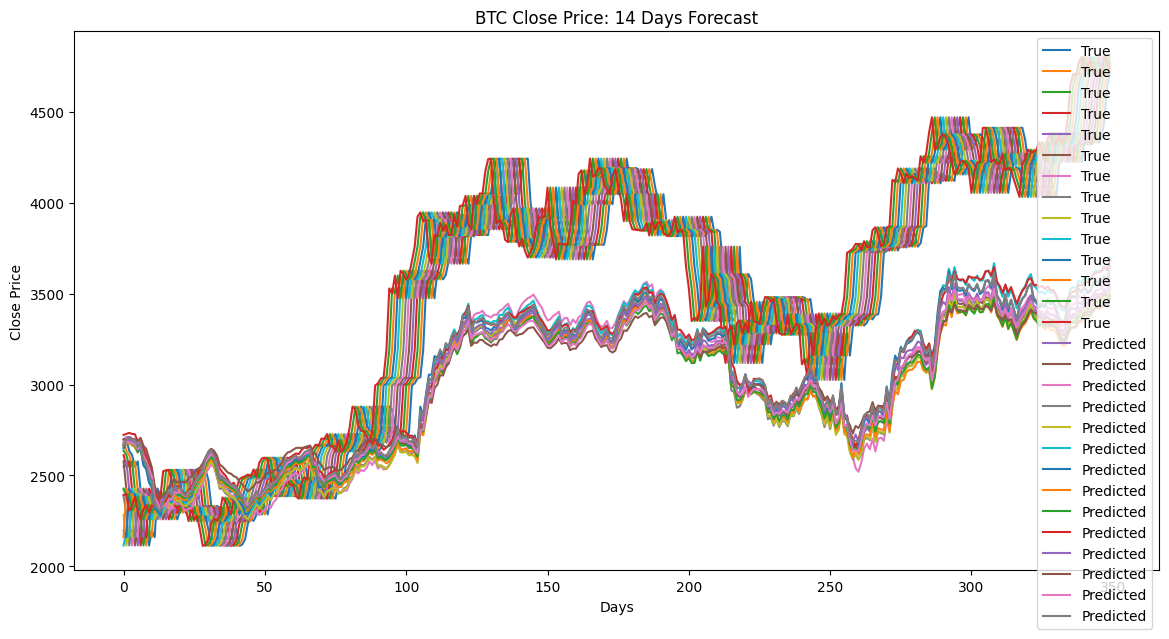

1/1 [==============================] - 0s 34ms/step


Saved Conv-LSTM model for BTC

====== Processing ETH ======


C:\Users\allif\AppData\Local\Temp\ipykernel_23412\1457182898.py:27: DeprecationWarning:

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END batch_size=32, conv_filters=32, dropout=0.2, epochs=10, kernel_size=2, lstm_units=32; total time=   9.0s
[CV] END batch_size=32, conv_filters=32, dropout=0.2, epochs=10, kernel_size=2, lstm_units=32; total time=  12.7s
[CV] END batch_size=32, conv_filters=32, dropout=0.2, epochs=10, kernel_size=2, lstm_units=32; total time=  12.7s
[CV] END batch_size=32, conv_filters=16, dropout=0.1, epochs=15, kernel_size=5, lstm_units=64; total time=   9.2s
[CV] END batch_size=32, conv_filters=16, dropout=0.1, epochs=15, kernel_size=5, lstm_units=64; total time=  15.1s
[CV] END batch_size=32, conv_filters=16, dropout=0.1, epochs=15, kernel_size=5, lstm_units=64; total time=  25.4s
[CV] END batch_size=32, conv_filters=64, dropout=0.1, epochs=10, kernel_size=5, lstm_units=32; total time=  10.0s
[CV] END batch_size=32, conv_filters=64, dropout=0.1, epochs=10, kernel_size=5, lstm_units=32; total time=  11.7s
[CV] END batch_size=32, conv

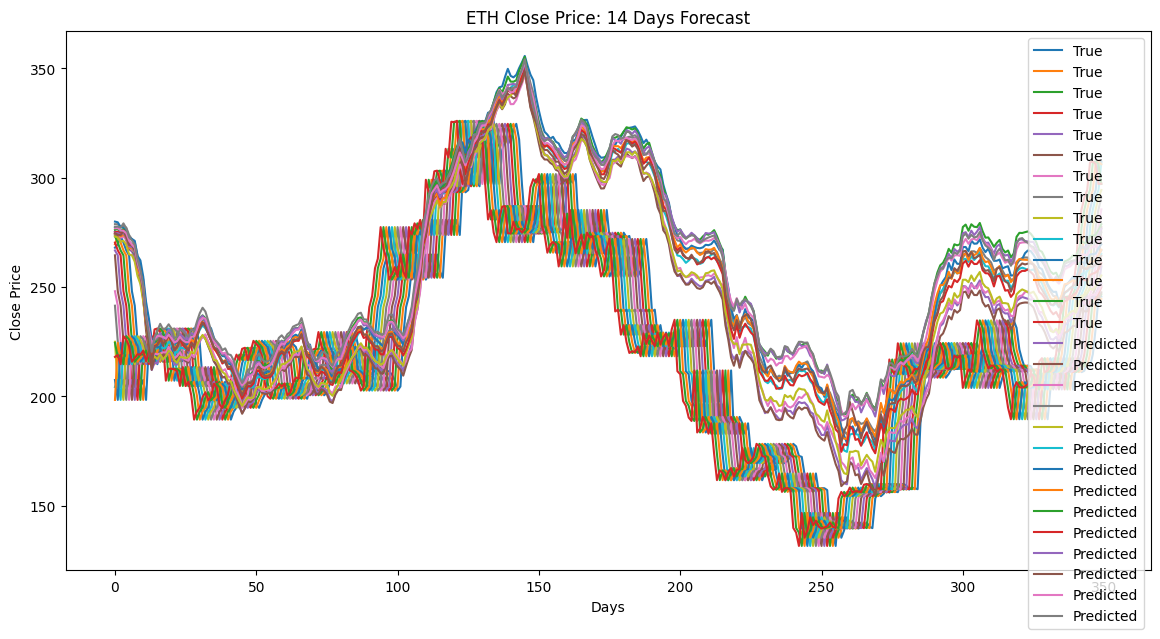

1/1 [==============================] - 0s 29ms/step


Saved Conv-LSTM model for ETH

====== Processing LTC ======


C:\Users\allif\AppData\Local\Temp\ipykernel_23412\1457182898.py:27: DeprecationWarning:

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END batch_size=32, conv_filters=16, dropout=0.2, epochs=15, kernel_size=2, lstm_units=32; total time=   7.3s
[CV] END batch_size=32, conv_filters=16, dropout=0.2, epochs=15, kernel_size=2, lstm_units=32; total time=  10.9s
[CV] END batch_size=32, conv_filters=16, dropout=0.2, epochs=15, kernel_size=2, lstm_units=32; total time=  16.6s
[CV] END batch_size=32, conv_filters=64, dropout=0.2, epochs=10, kernel_size=3, lstm_units=64; total time=   9.0s
[CV] END batch_size=32, conv_filters=64, dropout=0.2, epochs=10, kernel_size=3, lstm_units=64; total time=  14.2s
[CV] END batch_size=32, conv_filters=64, dropout=0.2, epochs=10, kernel_size=3, lstm_units=64; total time=  17.7s
[CV] END batch_size=16, conv_filters=16, dropout=0.2, epochs=15, kernel_size=5, lstm_units=64; total time=  12.9s
[CV] END batch_size=16, conv_filters=16, dropout=0.2, epochs=15, kernel_size=5, lstm_units=64; total time=  22.3s
[CV] END batch_size=16, conv

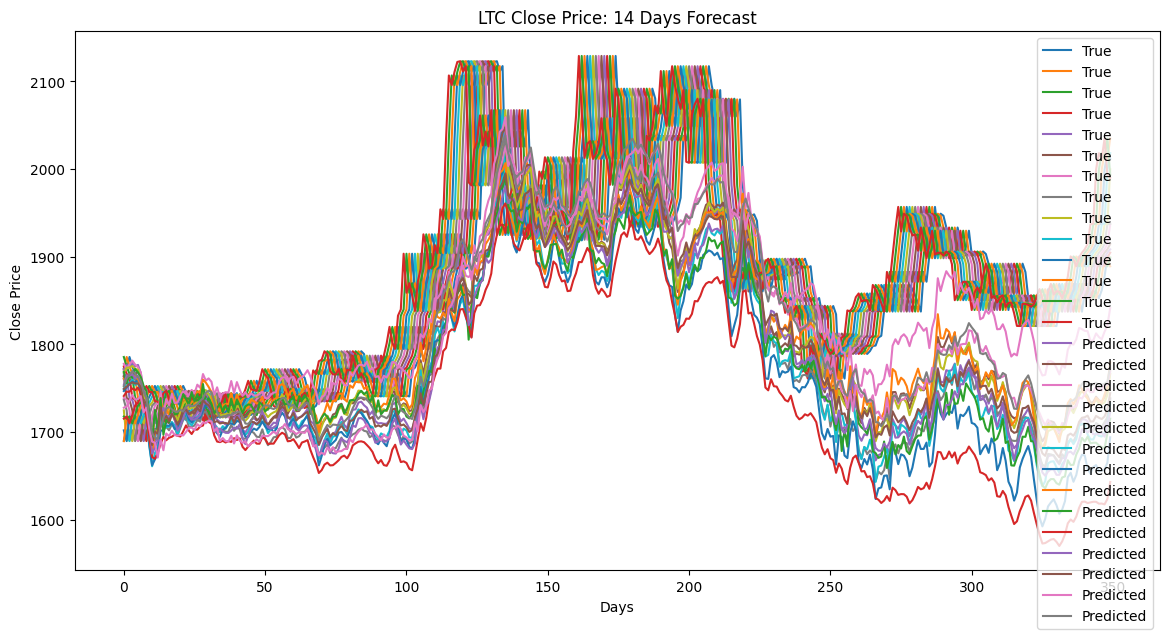

1/1 [==============================] - 0s 211ms/step


Saved Conv-LSTM model for LTC

====== Processing Gold ======


C:\Users\allif\AppData\Local\Temp\ipykernel_23412\1457182898.py:27: DeprecationWarning:

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END batch_size=16, conv_filters=64, dropout=0.1, epochs=10, kernel_size=5, lstm_units=32; total time=  19.0s
[CV] END batch_size=16, conv_filters=64, dropout=0.1, epochs=10, kernel_size=5, lstm_units=32; total time=  30.1s
[CV] END batch_size=16, conv_filters=64, dropout=0.1, epochs=10, kernel_size=5, lstm_units=32; total time=  48.8s
[CV] END batch_size=16, conv_filters=64, dropout=0.2, epochs=10, kernel_size=2, lstm_units=64; total time=  24.9s
[CV] END batch_size=16, conv_filters=64, dropout=0.2, epochs=10, kernel_size=2, lstm_units=64; total time=  45.7s
[CV] END batch_size=16, conv_filters=64, dropout=0.2, epochs=10, kernel_size=2, lstm_units=64; total time=  47.0s
[CV] END batch_size=32, conv_filters=64, dropout=0.2, epochs=15, kernel_size=3, lstm_units=32; total time=  10.8s
[CV] END batch_size=32, conv_filters=64, dropout=0.2, epochs=15, kernel_size=3, lstm_units=32; total time=  27.3s
[CV] END batch_size=32, conv

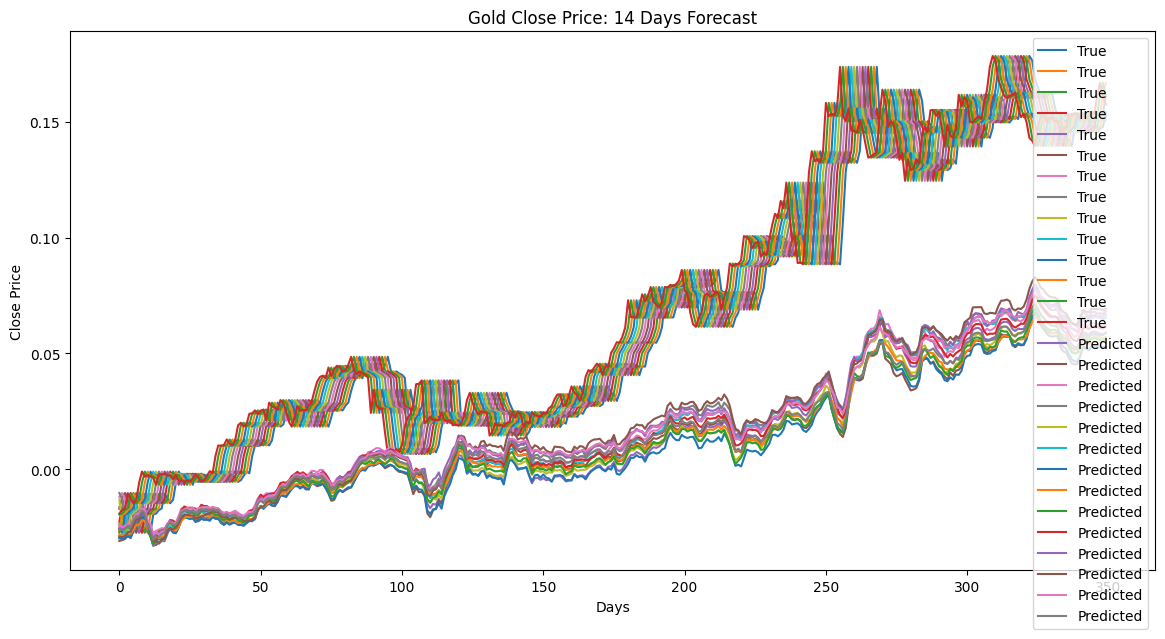

1/1 [==============================] - 0s 29ms/step


Saved Conv-LSTM model for Gold


In [11]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit

for coin, info in coins.items():
    print(f"\n====== Processing {coin} ======")
    target_col = info['col']
    col_index = scaled_df.columns.get_loc(target_col)
    
    # Create sliding windows
    X, Y = create_sliding_window(scaled_df, lookback, forecast_horizon, feature_cols, target_col)
    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    Y_train, Y_test = Y[:split], Y[split:]
    Y_train_flat = Y_train.reshape(-1, forecast_horizon)
    Y_test_flat = Y_test.reshape(-1, forecast_horizon)
    
    # Model builder for RandomizedSearchCV
    def model_builder(lstm_units=64, conv_filters=32, kernel_size=3, dropout=0.2, lr=0.001):
        model = Sequential()
        model.add(Conv1D(filters=conv_filters, kernel_size=kernel_size, activation='relu', input_shape=(lookback, len(feature_cols))))
        model.add(LSTM(lstm_units))
        model.add(Dropout(dropout))
        model.add(Dense(forecast_horizon))
        model.compile(optimizer='adam', loss='mse')
        return model

    keras_reg = KerasRegressor(build_fn=model_builder, verbose=0)

    # Define hyperparameter search space
    param_dist = {
        "lstm_units": [32, 64],
        "conv_filters": [16, 32, 64],
        "kernel_size": [2, 3, 5],
        "dropout": [0.1, 0.2],
        "batch_size": [16, 32],
        "epochs": [10, 15]
    }
    tscv = TimeSeriesSplit(n_splits=3)
    search = RandomizedSearchCV(
        keras_reg, param_distributions=param_dist, n_iter=4,
        cv=tscv, verbose=2, n_jobs=1
    )
    search.fit(X_train, Y_train_flat)
    print(f"Best hyperparameters for {coin}:", search.best_params_)
    
    # Retrain the best model
    best = search.best_params_
    best_model = model_builder(
        lstm_units=best["lstm_units"],
        conv_filters=best["conv_filters"],
        kernel_size=best["kernel_size"],
        dropout=best["dropout"],
        lr=0.001,   # Learning rate is fixed for simplicity
    )
    best_model.fit(
        X_train, Y_train_flat,
        epochs=best["epochs"],
        batch_size=best["batch_size"],
        verbose=2
    )
    
    # Evaluation of the model
    y_pred = best_model.predict(X_test).reshape(-1, forecast_horizon)
    true_unscaled = inverse_close(Y_test_flat, scaler, col_index)
    pred_unscaled = inverse_close(y_pred, scaler, col_index)
    mae = mean_absolute_error(true_unscaled, pred_unscaled)
    rmse = mean_squared_error(true_unscaled, pred_unscaled, squared=False)
    r2 = r2_score(true_unscaled, pred_unscaled)
    print(f"{coin} MAE: {mae:.2f} | RMSE: {rmse:.2f} | R2: {r2:.4f}")
    
    # Plotting the backtest 
    plt.figure(figsize=(14, 7))
    plt.plot(true_unscaled, label='True')
    plt.plot(pred_unscaled, label='Predicted')
    plt.title(f"{coin} Close Price: 14 Days Forecast")
    plt.xlabel('Days')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()
    
    # Future forecast(14 days)
    last_window = scaled_df[feature_cols].iloc[-lookback:].values.reshape(1, lookback, len(feature_cols))
    future_scaled = best_model.predict(last_window).reshape(forecast_horizon)
    future_unscaled = inverse_close(future_scaled, scaler, col_index).flatten()
    last_date = scaled_df['Date'].iloc[-1]
    future_dates = pd.date_range(last_date + timedelta(days=1), periods=forecast_horizon)
    
    import plotly.graph_objects as go

    # Plotting future forecast
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=future_dates, y=future_unscaled, mode='lines+markers', name=f'{coin} Forecast (next 14d)'))
    fig.update_layout(title=f'{coin} 14-Day Future Forecast (Unseen Data)', xaxis_title='Date', yaxis_title=f'{coin} Close Price (USD)')
    fig.show()

    # Saving the model
    best_model.save(f"{coin.lower()}_conv_lstm_14d_model.h5")
    print(f"Saved Conv-LSTM model for {coin}")

